## Assigment 5 - Fetching the weather
## Professor: Laurie Cutrone
## Student: Felix Cazarez
## Programming for Data Science

This resource teaches you how to access the Raspberry Pi Weather Station database using a RESTful API, how to use the haversine formula to calculate which weather station is closest to you, and how to fetch the latest weather data from that station.

Skills to developed:

How to access a RESTful API in Python.
How to convert JSON data into dictionaries.
How to pretty-print data.
How to calculate distances between two points on the Earth’s surface.

In [68]:
#Installing needed libraries:

In [69]:
!pip install requests

In [70]:
# Calling needed libraries

In [71]:
from requests import get
import json
from pprint import pprint

## Calling weather stations

In [72]:
url_weather_station = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations'

In [73]:
stations = get(url_weather_station).json()['items']

In [74]:
pprint(stations)

[{'weather_stn_id': 255541,
  'weather_stn_lat': 52.213842,
  'weather_stn_long': 0.110421,
  'weather_stn_name': 'Pi Towers Demo'},
 {'weather_stn_id': 296861,
  'weather_stn_lat': 52.346752,
  'weather_stn_long': 0.333975,
  'weather_stn_name': 'Home'},
 {'weather_stn_id': 316321,
  'weather_stn_lat': 52.32984,
  'weather_stn_long': 0.337129,
  'weather_stn_name': 'SVC1'},
 {'weather_stn_id': 490722,
  'weather_stn_lat': 52.059168,
  'weather_stn_long': 1.181303,
  'weather_stn_name': 'JimStation1'},
 {'weather_stn_id': 497527,
  'weather_stn_lat': 57.693646,
  'weather_stn_long': -4.251687,
  'weather_stn_name': 'Alness Academy '},
 {'weather_stn_id': 497974,
  'weather_stn_lat': 52.064358,
  'weather_stn_long': 1.153287,
  'weather_stn_name': 'christchurch'},
 {'weather_stn_id': 504487,
  'weather_stn_lat': 48.949147,
  'weather_stn_long': 3.126924,
  'weather_stn_name': 'pi-celine-77'},
 {'weather_stn_id': 505047,
  'weather_stn_lat': 55.009497,
  'weather_stn_long': -1.614494,
  

In [75]:
stations

[{'weather_stn_id': 255541,
  'weather_stn_name': 'Pi Towers Demo',
  'weather_stn_lat': 52.213842,
  'weather_stn_long': 0.110421},
 {'weather_stn_id': 296861,
  'weather_stn_name': 'Home',
  'weather_stn_lat': 52.346752,
  'weather_stn_long': 0.333975},
 {'weather_stn_id': 316321,
  'weather_stn_name': 'SVC1',
  'weather_stn_lat': 52.32984,
  'weather_stn_long': 0.337129},
 {'weather_stn_id': 490722,
  'weather_stn_name': 'JimStation1',
  'weather_stn_lat': 52.059168,
  'weather_stn_long': 1.181303},
 {'weather_stn_id': 497527,
  'weather_stn_name': 'Alness Academy ',
  'weather_stn_lat': 57.693646,
  'weather_stn_long': -4.251687},
 {'weather_stn_id': 497974,
  'weather_stn_name': 'christchurch',
  'weather_stn_lat': 52.064358,
  'weather_stn_long': 1.153287},
 {'weather_stn_id': 504487,
  'weather_stn_name': 'pi-celine-77',
  'weather_stn_lat': 48.949147,
  'weather_stn_long': 3.126924},
 {'weather_stn_id': 505047,
  'weather_stn_name': 'ARFS1',
  'weather_stn_lat': 55.009497,
  'w

## Review the meassurements from a weather station

In [76]:
url_meassure = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/'

In [77]:
url_Home = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/296861'

In [78]:
wheather_home = get(url_Home).json()['items']
pprint(wheather_home)

[{'air_pressure': 101.49,
  'air_quality': 57.9,
  'ambient_temp': 12.01,
  'created_by': 'Home',
  'created_on': '2015-04-03T17:50:02Z',
  'ground_temp': 9.69,
  'humidity': 77.99,
  'id': 483037,
  'rainfall': 0,
  'reading_timestamp': '2015-04-03T17:50:02Z',
  'updated_by': 'Home',
  'updated_on': '2015-11-17T20:18:52.873Z',
  'weather_stn_id': 296861,
  'wind_gust_speed': 1.92,
  'wind_speed': 0.24}]


## Longitude and latitud

In [79]:
# installing haversine.py

In [80]:
!pip install haversine

In [81]:
# Calling needed Libraries

In [82]:
from math import radians, cos, sin, asin, sqrt

In [83]:
#defining haversine

In [84]:
def haversine(lon1, lat1, lon2, lat2):
    #convert degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)  
    #dinstance between two points:
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    r = 6371 #6371 is the radius of the Earth in km
    distance = 2 * asin(sqrt(a)) * r 
    return distance

In [85]:
haversine(-0.155479, -78.468007, 49.887850, -97.151446)

1892.4296202704566

## Additional Step, asking for your city

In [86]:
import requests

In [87]:
city = input("What is your city?: ")

What is your city?: Winnipeg


In [111]:
url_geo = f"https://nominatim.openstreetmap.org/search?q={city}&format=json"
response = requests.get(url_geo)
data = response.json()

In [112]:
my_latitude = data[0]["lat"]
my_longitude = data[0]["lon"]

In [113]:
print(f"Your Latitude is : {my_latitude}")
print(f"Your Longitude is: {my_longitude}")

Your Latitude is : 49.8955367
Your Longitude is: -97.1384584


## Fetch your local weather

In [159]:
my_lat = float(my_latitude)
my_lon = float(my_longitude)

In [170]:
def find_closest():
    smallest = 20036
    for station in stations:
        station_lon = station['weather_stn_long']
        station_lat = station['weather_stn_lat']
        distance = haversine(my_lon, my_lat, station_lon, station_lat)
        if distance < smallest:
            smallest = distance
            closest_station = station['weather_stn_id']
    return closest_station
        

In [176]:
def find_closest_name():
    smallest = 20036
    for station in stations:
        station_lon = station['weather_stn_long']
        station_lat = station['weather_stn_lat']
        distance = haversine(my_lon, my_lat, station_lon, station_lat)
        if distance < smallest:
            smallest = distance
            closest_station_name = station['weather_stn_name']
    return closest_station_name

In [177]:
find_closest()

3528546

In [178]:
print(f'The closest weather station is:{find_closest_name()}')

The closest weather station is:MCC Weather Station


In [179]:
#Now we know the nearest station we can find just for it in the meassurements url

In [180]:
my_weather = get(url_meassure+str(find_closest())).json()['items']

In [181]:
import pandas as pd

In [182]:
df = pd.DataFrame(my_weather)

In [199]:
df_numerical = df[['ambient_temp', 'ground_temp', 'air_quality', 'air_pressure', 'humidity', 'wind_direction', 'wind_gust_speed']]

In [201]:
df_numerical.transpose()

,0
ambient_temp,-14.02
ground_temp,-8.63
air_quality,67.01
air_pressure,993.23
humidity,44.22
wind_direction,234.06
wind_gust_speed,12.97


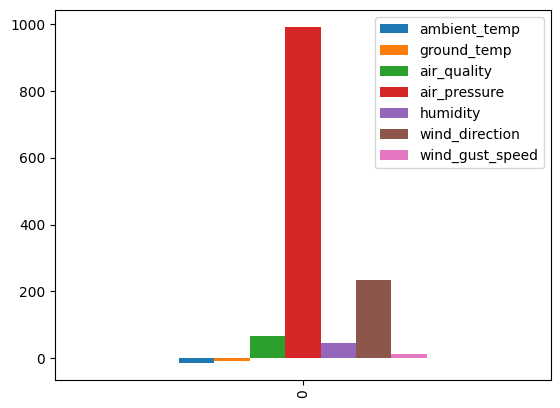

In [204]:
df_numerical.plot(kind='bar')
plt.show()